**1.1. Machine Learning Workflow and Ethics**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




**The Original Dataset is from Kaggle**

**The Topic of the Dataset is Student Performance Factors**

**The Dataset License CC0: Public Domain**

**Here is the link to the riginal Dataset: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download**






In [2]:
# First thing to do is to import required libraries
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

**1.1.1 Dataset Selection and Problem Definition**

In [3]:
# Start by reading from testdata.csv file

file_path = "/content/drive/My Drive/Colab Notebooks/Student-Performance-Factors-CSV/corrupted_dataset.csv"
missing_values = ["n/a", "na", "<NA>", "nan", "--", "NULL", "Not Available", 'not available' ,'unknown', "Unknown"]
df = pd.read_csv(file_path, na_values=missing_values)

In [4]:
# The shape of the dataset
df.shape

(11123, 20)

In [5]:
# Reading from StudentPerformanceFactors.csv file first rows
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,NaN,84.0,low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,NaN,No,High School,near,Male,67
1,19.0,64.0,Low,Medium,No,NaN,59,Low,Yes,2,medium,Medium,Public,Negative,4,No,College,Moderate,female,61
2,24.0,98.0,Medium,medium,Yes,7,91,Medium,Yes,2,Medium,Medium,NaN,Neutral,4,No,Postgraduate,Near,Male,NaN
3,29.0,89.0,Low,Medium,Yes,8,98,Medium,Yes,NaN,Medium,Medium,Public,NaN,NaN,NaN,NaN,Moderate,Male,71
4,19.0,92.0,Medium,Medium,Yes,NaN,sixty-five,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,near,Female,70


In [6]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
11118,19.0,74.0,medium,High,Yes,7,68,Medium,NaN,2,Low,High,Public,NaN,2,No,high school,Near,Female,66
11119,25.0,75.0,Low,High,No,7,57,High,NaN,4,Low,High,public,Positive,5,No,College,Near,Male,70
11120,18.0,90.0,Low,medium,No,NaN,88,Low,Yes,1,Medium,medium,Private,NaN,1,No,High School,NaN,Female,65
11121,19.0,80.0,High,medium,Yes,9,54,Medium,Yes,0,NaN,Medium,Public,NaN,two,No,postgraduate,NaN,NaN,65
11122,18.0,94.0,Low,Medium,Yes,7,51,Medium,Yes,1,Low,Medium,Public,Neutral,3,Yes,College,Moderate,Male,65


In [7]:
# Displaying data type
print(df.dtypes)

Hours_Studied                 float64
Attendance                    float64
Parental_Involvement           object
Access_to_Resources            object
Extracurricular_Activities     object
Sleep_Hours                    object
Previous_Scores                object
Motivation_Level               object
Internet_Access                object
Tutoring_Sessions              object
Family_Income                  object
Teacher_Quality                object
School_Type                    object
Peer_Influence                 object
Physical_Activity              object
Learning_Disabilities          object
Parental_Education_Level       object
Distance_from_Home             object
Gender                         object
Exam_Score                     object
dtype: object


In [8]:
# Displaying data info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               10147 non-null  float64
 1   Attendance                  10130 non-null  float64
 2   Parental_Involvement        10162 non-null  object 
 3   Access_to_Resources         10159 non-null  object 
 4   Extracurricular_Activities  10171 non-null  object 
 5   Sleep_Hours                 10130 non-null  object 
 6   Previous_Scores             10159 non-null  object 
 7   Motivation_Level            10162 non-null  object 
 8   Internet_Access             10182 non-null  object 
 9   Tutoring_Sessions           10085 non-null  object 
 10  Family_Income               10167 non-null  object 
 11  Teacher_Quality             10059 non-null  object 
 12  School_Type                 10166 non-null  object 
 13  Peer_Influence              101

** *italicised text*1.1.2 Data Preprocessing**

In [9]:
# Dictionary for numbers 0-19
word_to_number_dict = {
    "zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9,
    "ten": 10, "eleven": 11, "twelve": 12, "thirteen": 13, "fourteen": 14, "fifteen": 15, "sixteen": 16,
    "seventeen": 17, "eighteen": 18, "nineteen": 19
}

# Dictionary for tens (20-90)
tens_dict = {
    "twenty": 20, "thirty": 30, "forty": 40, "fifty": 50, "sixty": 60,
    "seventy": 70, "eighty": 80, "ninety": 90
}

def words_to_numbers(word):
    "Convert written numbers back into integers, including compound words like 'twenty-three'."
    word = word.lower().strip()  # Ensure lowercase and remove spaces

    # Direct conversion for numbers 0-19
    if word in word_to_number_dict:
        return word_to_number_dict[word]

    # Direct conversion for multiples of ten (20, 30, ... 90)
    if word in tens_dict:
        return tens_dict[word]

    # Handle compound numbers like "twenty-three"
    if "-" in word:
        parts = word.split("-")
        if len(parts) == 2 and parts[0] in tens_dict and parts[1] in word_to_number_dict:
            return tens_dict[parts[0]] + word_to_number_dict[parts[1]]

    return word  # Return unchanged if not a recognisable number


In [10]:
# List of numeric columns that were converted to words
numeric_columns = ["Hours_Studied", "Sleep_Hours", "Previous_Scores",
                   "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]

# Convert words back to numbers, handling exceptions
for col in numeric_columns:
    df[col] = df[col].apply(lambda x: words_to_numbers(x) if isinstance(x, str) else x)

# Convert all non-numeric values (like "not available") to NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert to integer, handling NaNs properly
df[numeric_columns] = df[numeric_columns].astype('Int64')  # Uses pandas nullable integer type


In [11]:
# Displaying data info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               10147 non-null  Int64  
 1   Attendance                  10130 non-null  float64
 2   Parental_Involvement        10162 non-null  object 
 3   Access_to_Resources         10159 non-null  object 
 4   Extracurricular_Activities  10171 non-null  object 
 5   Sleep_Hours                 10130 non-null  Int64  
 6   Previous_Scores             10152 non-null  Int64  
 7   Motivation_Level            10162 non-null  object 
 8   Internet_Access             10182 non-null  object 
 9   Tutoring_Sessions           10085 non-null  Int64  
 10  Family_Income               10167 non-null  object 
 11  Teacher_Quality             10059 non-null  object 
 12  School_Type                 10166 non-null  object 
 13  Peer_Influence              101

Define Missing Value Handling Function


In [12]:
# Function to fill missing numerical & categorical values
def fill_missing_values(df, numeric_columns, categorical_replacements):
    """
    - Fills missing numerical values with random numbers **within the column's min-max range**.
    - Fills missing categorical values using the most frequent category (mode).
    """
    # Convert numeric columns to numeric values
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Fill missing numeric values
    for col in numeric_columns:
        if df[col].isnull().sum() > 0:
            min_val, max_val = df[col].min(), df[col].max()
            df[col] = df[col].apply(lambda x: np.random.randint(min_val, max_val + 1) if pd.isnull(x) else x)

    # Fill missing categorical values using mode
    for col in categorical_replacements.keys():
        if col in df.columns and df[col].isnull().sum() > 0:
            most_frequent = df[col].mode()[0]
            df[col] = df[col].fillna(most_frequent)

    return df


Define Encoding Function

In [13]:
# Function to encode categorical variables
def encode_categorical_variables(df, binary_categories, multi_class_categories):
    """
    - Performs One-Hot Encoding for binary categories.
    - Converts multi-class categories using Label Encoding + pd.get_dummies().
    """
    # Standardise categorical values
    df[binary_categories + multi_class_categories] = df[binary_categories + multi_class_categories].apply(
        lambda x: x.astype(str).str.strip().str.lower()
    )

    # Standardise specific categorical variables
    standardise_mapping = {
        "Parental_Education_Level": {"high school": "High School", "college": "College", "postgraduate": "Postgraduate"},
        "Distance_from_Home": {"near": "Near", "moderate": "Moderate", "far": "Far"},
        "Peer_Influence": {"positive": "Positive", "neutral": "Neutral", "negative": "Negative"},
        "Teacher_Quality": {"low": "Low", "medium": "Medium", "high": "High"},
        "Family_Income": {"low": "Low", "medium": "Medium", "high": "High"},
        "Motivation_Level": {"low": "Low", "medium": "Medium", "high": "High"},
        "Access_to_Resources": {"low": "Low", "medium": "Medium", "high": "High"},
        "Parental_Involvement": {"low": "Low", "medium": "Medium", "high": "High"},
        "Extracurricular_Activities": {"yes": "Yes", "no": "No"},
        "Internet_Access": {"yes": "Yes", "no": "No"},
        "School_Type": {"public": "Public", "private": "Private"},
        "Learning_Disabilities": {"yes": "Yes", "no": "No"},
        "Gender": {"male": "Male", "female": "Female"}
    }

    for col, mapping in standardise_mapping.items():
        if col in df.columns:
            df[col] = df[col].replace(mapping)

    # Apply One-Hot Encoding
    df = pd.get_dummies(df, columns=list(standardise_mapping.keys()), prefix=list(standardise_mapping.keys()))

    # Ensure Correct Column Order & Handle Missing Categories
    ordered_columns = {
        "Parental_Education_Level": ["Parental_Education_Level_High School", "Parental_Education_Level_College", "Parental_Education_Level_Postgraduate"],
        "Distance_from_Home": ["Distance_from_Home_Near", "Distance_from_Home_Moderate", "Distance_from_Home_Far"],
        "Peer_Influence": ["Peer_Influence_Positive", "Peer_Influence_Neutral", "Peer_Influence_Negative"],
        "Teacher_Quality": ["Teacher_Quality_Low", "Teacher_Quality_Medium", "Teacher_Quality_High"],
        "Family_Income": ["Family_Income_Low", "Family_Income_Medium", "Family_Income_High"],
        "Motivation_Level": ["Motivation_Level_Low", "Motivation_Level_Medium", "Motivation_Level_High"],
        "Access_to_Resources": ["Access_to_Resources_Low", "Access_to_Resources_Medium", "Access_to_Resources_High"],
        "Parental_Involvement": ["Parental_Involvement_Low", "Parental_Involvement_Medium", "Parental_Involvement_High"],
        "Extracurricular_Activities": ["Extracurricular_Activities_Yes", "Extracurricular_Activities_No"],
        "Internet_Access": ["Internet_Access_Yes", "Internet_Access_No"],
        "School_Type": ["School_Type_Public", "School_Type_Private"],
        "Learning_Disabilities": ["Learning_Disabilities_Yes", "Learning_Disabilities_No"],
        "Gender": ["Gender_Male", "Gender_Female"]
    }

    for col, expected_columns in ordered_columns.items():
        for expected_col in expected_columns:
            if expected_col not in df.columns:
                df[expected_col] = 0  # Add missing columns

    # Convert boolean values (from One-Hot Encoding) to integers (0/1)
    df = df.astype(int)

    return df


Define Column Names & Load Dataset

In [14]:
numeric_columns = [
    "Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores",
    "Tutoring_Sessions", "Physical_Activity", "Exam_Score"
]

categorical_replacements = {
    "Parental_Involvement": ["Low", "Medium", "High"],
    "Access_to_Resources": ["Low", "Medium", "High"],
    "Extracurricular_Activities": ["Yes", "No"],
    "Motivation_Level": ["Low", "Medium", "High"],
    "Internet_Access": ["Yes", "No"],
    "Family_Income": ["Low", "Medium", "High"],
    "Teacher_Quality": ["Low", "Medium", "High"],
    "School_Type": ["Public", "Private"],
    "Peer_Influence": ["Positive", "Neutral", "Negative"],
    "Learning_Disabilities": ["Yes", "No"],
    "Parental_Education_Level": ["High School", "College", "Postgraduate"],
    "Distance_from_Home": ["Near", "Moderate", "Far"],
    "Gender": ["Male", "Female"]
}



binary_categories = [
    "Internet_Access", "Extracurricular_Activities", "Learning_Disabilities", "Gender", "School_Type"
]

multi_class_categories = [
    "Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income",
    "Teacher_Quality", "Peer_Influence", "Distance_from_Home", "Parental_Education_Level"
]

Run Processing Steps

In [15]:
df = fill_missing_values(df, numeric_columns, categorical_replacements)
df = encode_categorical_variables(df, binary_categories, multi_class_categories)

print("Processed Data:")
print(df.head())

import IPython.display
IPython.display.display(df)


Processed Data:
   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0              7          84            7               73                  0   
1             19          64            6               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  3   
4             19          92            8               65                  3   

   Physical_Activity  Exam_Score  Parental_Education_Level_College  \
0                  4          67                                 0   
1                  4          61                                 1   
2                  4          62                                 0   
3                  3          71                                 0   
4                  4          70                                 1   

   Parental_Education_Level_High School  \
0                                

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,...,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,School_Type_Private,School_Type_Public,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
0,7,84,7,73,0,4,67,0,1,0,...,1,0,0,1,0,1,1,0,0,1
1,19,64,6,59,2,4,61,1,0,0,...,1,0,0,1,0,1,1,0,1,0
2,24,98,7,91,2,4,62,0,0,1,...,0,1,0,1,0,1,1,0,0,1
3,29,89,8,98,3,3,71,0,1,0,...,0,1,0,1,0,1,1,0,0,1
4,19,92,8,65,3,4,70,1,0,0,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,19,74,7,68,2,2,66,0,1,0,...,0,1,0,1,0,1,1,0,1,0
11119,25,75,7,57,4,5,70,1,0,0,...,1,0,0,1,0,1,1,0,0,1
11120,18,90,6,88,1,1,65,0,1,0,...,1,0,0,1,1,0,1,0,1,0
11121,19,80,9,54,0,2,65,0,0,1,...,0,1,0,1,0,1,1,0,0,1


In [16]:
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,...,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,School_Type_Private,School_Type_Public,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
0,7,84,7,73,0,4,67,0,1,0,...,1,0,0,1,0,1,1,0,0,1
1,19,64,6,59,2,4,61,1,0,0,...,1,0,0,1,0,1,1,0,1,0
2,24,98,7,91,2,4,62,0,0,1,...,0,1,0,1,0,1,1,0,0,1
3,29,89,8,98,3,3,71,0,1,0,...,0,1,0,1,0,1,1,0,0,1
4,19,92,8,65,3,4,70,1,0,0,...,0,1,0,1,0,1,1,0,1,0


In [17]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Show only columns with missing values
print("Total Missing Values Per Column:")
print(missing_values[missing_values > 0])


Total Missing Values Per Column:
Series([], dtype: int64)


In [18]:
# Calculate percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display only columns that have missing values
print("Percentage of Missing Values Per Column:")
print(missing_percentage[missing_percentage > 0])


Percentage of Missing Values Per Column:
Series([], dtype: float64)


In [19]:
# Find duplicate rows
duplicates = df[df.duplicated()]
print(f"Total Duplicate Rows: {len(duplicates)}")

# Display the first few duplicate rows
print(duplicates.head())


Total Duplicate Rows: 916
      Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
6622             27          92            5               61   
6635             20          98            9               71   
6637             14          62            7               79   
6641             13          72            8               52   
6665             20          66            8               93   

      Tutoring_Sessions  Physical_Activity  Exam_Score  \
6622                  0                  3          74   
6635                  0                  4          69   
6637                  2                  2          62   
6641                  3                  4          65   
6665                  2                  3          65   

      Parental_Education_Level_College  Parental_Education_Level_High School  \
6622                                 0                                     0   
6635                                 1                                    

In [20]:
df = df.drop_duplicates()


In [21]:
df = df.drop_duplicates().reset_index(drop=True)


In [22]:
df = df[df.duplicated() == False]


In [23]:
print(f"Total Duplicate Rows After Cleaning: {df.duplicated().sum()}")


Total Duplicate Rows After Cleaning: 0


In [24]:
df.shape

(10207, 41)

In [25]:
# Display rows where any value is missing
missing_rows = df[df.isnull().any(axis=1)]
print(f"Total Rows with Missing Values: {len(missing_rows)}")
print(missing_rows.head())  # Show the first few rows with missing values


Total Rows with Missing Values: 0
Empty DataFrame
Columns: [Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score, Parental_Education_Level_College, Parental_Education_Level_High School, Parental_Education_Level_Postgraduate, Distance_from_Home_Far, Distance_from_Home_Moderate, Distance_from_Home_Near, Peer_Influence_Negative, Peer_Influence_Neutral, Peer_Influence_Positive, Teacher_Quality_High, Teacher_Quality_Low, Teacher_Quality_Medium, Family_Income_High, Family_Income_Low, Family_Income_Medium, Motivation_Level_High, Motivation_Level_Low, Motivation_Level_Medium, Access_to_Resources_High, Access_to_Resources_Low, Access_to_Resources_Medium, Parental_Involvement_High, Parental_Involvement_Low, Parental_Involvement_Medium, Extracurricular_Activities_No, Extracurricular_Activities_Yes, Internet_Access_No, Internet_Access_Yes, School_Type_Private, School_Type_Public, Learning_Disabilities_No, Learning_Disabilities_Yes, Gender_Female

In [26]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Show only columns with missing values
print("Total Missing Values Per Column:")
print(missing_values[missing_values > 0])


Total Missing Values Per Column:
Series([], dtype: int64)


In [27]:
df.tail()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,...,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,School_Type_Private,School_Type_Public,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
10202,37,89,8,74,2,2,79,0,1,0,...,0,1,0,1,0,1,1,0,0,1
10203,21,94,6,99,1,2,72,0,1,0,...,1,0,0,1,1,0,1,0,0,1
10204,19,74,7,68,2,2,66,0,1,0,...,0,1,0,1,0,1,1,0,1,0
10205,18,90,6,88,1,1,65,0,1,0,...,1,0,0,1,1,0,1,0,1,0
10206,19,80,9,54,0,2,65,0,0,1,...,0,1,0,1,0,1,1,0,0,1


In [28]:
# Check if any NaN values still exist
print("Missing values after dropping rows:\n", df.isnull().sum())


Missing values after dropping rows:
 Hours_Studied                            0
Attendance                               0
Sleep_Hours                              0
Previous_Scores                          0
Tutoring_Sessions                        0
Physical_Activity                        0
Exam_Score                               0
Parental_Education_Level_College         0
Parental_Education_Level_High School     0
Parental_Education_Level_Postgraduate    0
Distance_from_Home_Far                   0
Distance_from_Home_Moderate              0
Distance_from_Home_Near                  0
Peer_Influence_Negative                  0
Peer_Influence_Neutral                   0
Peer_Influence_Positive                  0
Teacher_Quality_High                     0
Teacher_Quality_Low                      0
Teacher_Quality_Medium                   0
Family_Income_High                       0
Family_Income_Low                        0
Family_Income_Medium                     0
Motivation_Level_

In [29]:
df.tail()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,...,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,School_Type_Private,School_Type_Public,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
10202,37,89,8,74,2,2,79,0,1,0,...,0,1,0,1,0,1,1,0,0,1
10203,21,94,6,99,1,2,72,0,1,0,...,1,0,0,1,1,0,1,0,0,1
10204,19,74,7,68,2,2,66,0,1,0,...,0,1,0,1,0,1,1,0,1,0
10205,18,90,6,88,1,1,65,0,1,0,...,1,0,0,1,1,0,1,0,1,0
10206,19,80,9,54,0,2,65,0,0,1,...,0,1,0,1,0,1,1,0,0,1


In [30]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Show only columns with missing values
print("Total Missing Values Per Column:")
print(missing_values[missing_values > 0])


Total Missing Values Per Column:
Series([], dtype: int64)


In [31]:
df.tail()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,...,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,School_Type_Private,School_Type_Public,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
10202,37,89,8,74,2,2,79,0,1,0,...,0,1,0,1,0,1,1,0,0,1
10203,21,94,6,99,1,2,72,0,1,0,...,1,0,0,1,1,0,1,0,0,1
10204,19,74,7,68,2,2,66,0,1,0,...,0,1,0,1,0,1,1,0,1,0
10205,18,90,6,88,1,1,65,0,1,0,...,1,0,0,1,1,0,1,0,1,0
10206,19,80,9,54,0,2,65,0,0,1,...,0,1,0,1,0,1,1,0,0,1


In [32]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Show only columns with missing values
print("Total Missing Values Per Column:")
print(missing_values[missing_values > 0])


Total Missing Values Per Column:
Series([], dtype: int64)


In [33]:
df.tail()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,...,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,School_Type_Private,School_Type_Public,Learning_Disabilities_No,Learning_Disabilities_Yes,Gender_Female,Gender_Male
10202,37,89,8,74,2,2,79,0,1,0,...,0,1,0,1,0,1,1,0,0,1
10203,21,94,6,99,1,2,72,0,1,0,...,1,0,0,1,1,0,1,0,0,1
10204,19,74,7,68,2,2,66,0,1,0,...,0,1,0,1,0,1,1,0,1,0
10205,18,90,6,88,1,1,65,0,1,0,...,1,0,0,1,1,0,1,0,1,0
10206,19,80,9,54,0,2,65,0,0,1,...,0,1,0,1,0,1,1,0,0,1


In [34]:
# Displaying data info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          10207 non-null  int64
 1   Attendance                             10207 non-null  int64
 2   Sleep_Hours                            10207 non-null  int64
 3   Previous_Scores                        10207 non-null  int64
 4   Tutoring_Sessions                      10207 non-null  int64
 5   Physical_Activity                      10207 non-null  int64
 6   Exam_Score                             10207 non-null  int64
 7   Parental_Education_Level_College       10207 non-null  int64
 8   Parental_Education_Level_High School   10207 non-null  int64
 9   Parental_Education_Level_Postgraduate  10207 non-null  int64
 10  Distance_from_Home_Far                 10207 non-null  int64
 11  Distance_from_Home_Moderate 

In [35]:
df.shape

(10207, 41)

In [36]:
# Remove rows with any NaN values
df_cleaned = df.dropna()

# Check if any missing values remain
print(f"Remaining missing values:\n{df_cleaned.isnull().sum()}")


Remaining missing values:
Hours_Studied                            0
Attendance                               0
Sleep_Hours                              0
Previous_Scores                          0
Tutoring_Sessions                        0
Physical_Activity                        0
Exam_Score                               0
Parental_Education_Level_College         0
Parental_Education_Level_High School     0
Parental_Education_Level_Postgraduate    0
Distance_from_Home_Far                   0
Distance_from_Home_Moderate              0
Distance_from_Home_Near                  0
Peer_Influence_Negative                  0
Peer_Influence_Neutral                   0
Peer_Influence_Positive                  0
Teacher_Quality_High                     0
Teacher_Quality_Low                      0
Teacher_Quality_Medium                   0
Family_Income_High                       0
Family_Income_Low                        0
Family_Income_Medium                     0
Motivation_Level_High       

In [37]:
print(df["Hours_Studied"].value_counts())


Hours_Studied
20    681
21    632
19    622
23    598
22    590
18    578
17    538
24    505
16    502
15    456
14    415
25    405
26    390
27    347
13    336
12    303
28    269
11    246
29    216
30    199
9     143
31    140
10    134
32    112
7      93
8      92
33     72
34     63
35     47
4      47
6      44
3      42
5      42
36     38
2      37
37     34
39     33
44     27
38     27
42     27
1      26
43     24
40     18
41     17
Name: count, dtype: int64


In [38]:
print(df["Parental_Education_Level_High School"].value_counts())


Parental_Education_Level_High School
1    5556
0    4651
Name: count, dtype: int64


In [39]:
print(df["Gender_Female"].value_counts())


Gender_Female
0    6214
1    3993
Name: count, dtype: int64


**1.1.3 Exploratory Data Analysis**

**1.1.4 Model Development and Evaluation**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Split into features (X) and target variable (y)
X = df.drop(columns=["Exam_Score"])  # Assuming categorical features are already transformed
y = df["Exam_Score"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features (degree = 2 for interactions and squared terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define parameter grid for alpha tuning
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge Regression with Grid Search
ridge_search = GridSearchCV(Ridge(max_iter=5000), param_grid, cv=5, scoring="r2")  # 5-fold cross-validation
ridge_search.fit(X_train_poly, y_train)
best_ridge = ridge_search.best_estimator_  # Best Ridge model
y_pred_ridge = best_ridge.predict(X_test_poly)

# Lasso Regression with Grid Search
lasso_search = GridSearchCV(Lasso(max_iter=5000), param_grid, cv=5, scoring="r2")
lasso_search.fit(X_train_poly, y_train)
best_lasso = lasso_search.best_estimator_  # Best Lasso model
y_pred_lasso = best_lasso.predict(X_test_poly)

# Print best alpha values
print("Best Ridge Alpha:", ridge_search.best_params_["alpha"])
print("Best Lasso Alpha:", lasso_search.best_params_["alpha"])
print()

# Evaluate Ridge Regression
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print()

# Evaluate Lasso Regression
print("Lasso Regression R² Score:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Scatter plot: actual vs predicted values
# plt.figure(figsize=(8, 5))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Perfect fit line
# plt.xlabel("Actual Exam Scores")
# plt.ylabel("Predicted Exam Scores")
# plt.title("Actual vs Predicted Exam Scores")
# plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+05, tolerance: 2.748e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+05, tolerance: 2.700e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+05, tolerance: 2.773e

Best Ridge Alpha: 100
Best Lasso Alpha: 1

Ridge Regression R² Score: 0.13002162759179758
Ridge Regression RMSE: 5.827136538498319

Lasso Regression R² Score: 0.15696025727828045
Lasso Regression RMSE: 5.736209317633738


In [41]:
def regression_accuracy(y_true, y_pred, tolerance=5):
    """
    Calculates the percentage of predictions that fall within a certain range (tolerance)
    of the actual values.

    Args:
    - y_true: Actual values
    - y_pred: Predicted values
    - tolerance: Acceptable difference for a prediction to be considered 'correct'

    Returns:
    - Accuracy as a percentage
    """
    correct_predictions = np.abs(y_true - y_pred) <= tolerance
    accuracy = np.mean(correct_predictions) * 100
    return accuracy

# Compute accuracy for Ridge Regression
ridge_accuracy = regression_accuracy(y_test, y_pred_ridge)
print(f"Ridge Regression Accuracy (within ±5 points): {ridge_accuracy:.2f}%")

# Compute accuracy for Lasso Regression
lasso_accuracy = regression_accuracy(y_test, y_pred_lasso)
print(f"Lasso Regression Accuracy (within ±5 points): {lasso_accuracy:.2f}%")


Ridge Regression Accuracy (within ±5 points): 88.05%
Lasso Regression Accuracy (within ±5 points): 89.08%


Optimised R² Score: 0.07080157525990227
Optimised RMSE: 6.022200335110875


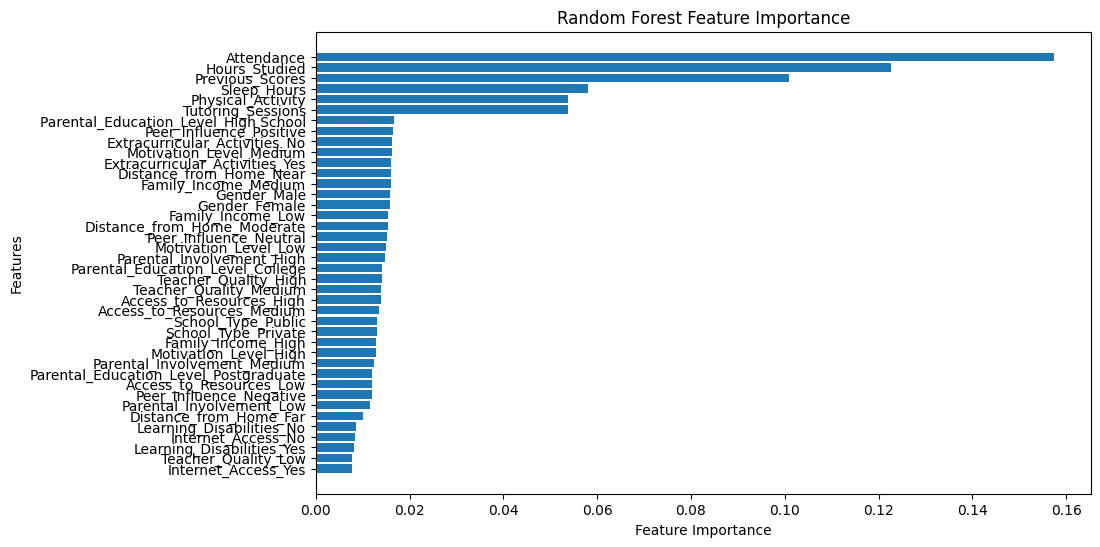


Feature Importance Rankings:
                                   Feature  Importance
1                              Attendance    0.157394
0                           Hours_Studied    0.122614
3                         Previous_Scores    0.100992
2                             Sleep_Hours    0.058154
5                       Physical_Activity    0.053825
4                       Tutoring_Sessions    0.053725
7    Parental_Education_Level_High School    0.016762
14                Peer_Influence_Positive    0.016552
30          Extracurricular_Activities_No    0.016297
23                Motivation_Level_Medium    0.016189
31         Extracurricular_Activities_Yes    0.016104
11                Distance_from_Home_Near    0.016100
20                   Family_Income_Medium    0.016064
39                            Gender_Male    0.015876
38                          Gender_Female    0.015766
19                      Family_Income_Low    0.015505
10            Distance_from_Home_Moderate    0.0154

In [42]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# Split into Train and Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model with Best Parameters
best_rf = RandomForestRegressor(
    max_depth=None,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

# Evaluate Model
print(f"Optimised R² Score: {r2_score(y_test, y_pred_best)}")
print("Optimised RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

# Feature Importance Analysis
importances = best_rf.feature_importances_
feature_names = X.columns

# Sort feature importance
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

# Convert to DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance Rankings:\n", feature_importance_df)

# **Step 2: Remove Least Important Features**
# Set a threshold to remove features with very low importance (e.g., less than 0.01)
importance_threshold = 0.015
important_features = feature_importance_df[feature_importance_df['Importance'] >= importance_threshold]['Feature'].tolist()

# Reduce dataset to only important features
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

print(f"\nRetaining {len(important_features)} out of {len(feature_names)} features.")

# **Step 3: Retrain Model with Reduced Features**
best_rf_reduced = RandomForestRegressor(
    max_depth=None,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
    random_state=42
)

best_rf_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = best_rf_reduced.predict(X_test_reduced)

# Evaluate the retrained model
print(f"\nRetrained R² Score: {r2_score(y_test, y_pred_reduced)}")
print("Retrained RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reduced)))

In [43]:
# Define accuracy function for regression models
def RandomForest_regression_accuracy(y_true, y_pred, tolerance=5):
    """
    Calculates the percentage of predictions that fall within a certain range (tolerance)
    of the actual values.

    Args:
    - y_true: Actual values
    - y_pred: Predicted values
    - tolerance: Acceptable difference for a prediction to be considered 'correct'

    Returns:
    - Accuracy as a percentage
    """
    correct_predictions = np.abs(y_true - y_pred) <= tolerance
    accuracy = np.mean(correct_predictions) * 100
    return accuracy

# Compute accuracy for the optimised Random Forest model
rf_accuracy = regression_accuracy(y_test, y_pred_best)
print(f"Random Forest Accuracy (within ±5 points): {rf_accuracy:.2f}%")

# Compute accuracy for the reduced-feature Random Forest model
rf_reduced_accuracy = regression_accuracy(y_test, y_pred_reduced)
print(f"Reduced Random Forest Accuracy (within ±5 points): {rf_reduced_accuracy:.2f}%")


Random Forest Accuracy (within ±5 points): 86.73%
Reduced Random Forest Accuracy (within ±5 points): 85.16%


SVR R² Score: 0.10460700029853609
SVR RMSE: 5.911637748068225
SVR Accuracy (within ±5 points): 86.53%


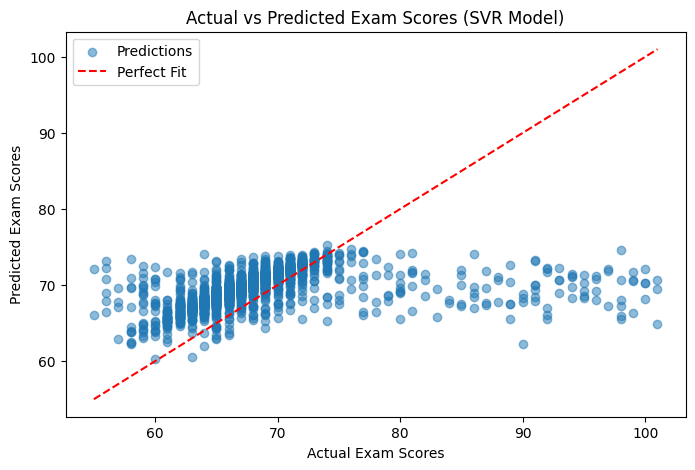

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Split into Train and Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR Model with Best Parameters (Using RBF Kernel)
svr_model = SVR(kernel="rbf", C=100, epsilon=5)  # C controls regularisation, epsilon defines margin of tolerance
svr_model.fit(X_train, y_train)

# Make Predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate Model Performance
print(f"SVR R² Score: {r2_score(y_test, y_pred_svr)}")
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

# Define accuracy function for regression models
def regression_accuracy(y_true, y_pred, tolerance=5):
    """
    Calculates the percentage of predictions that fall within a certain range (tolerance)
    of the actual values.

    Args:
    - y_true: Actual values
    - y_pred: Predicted values
    - tolerance: Acceptable difference for a prediction to be considered 'correct'

    Returns:
    - Accuracy as a percentage
    """
    correct_predictions = np.abs(y_true - y_pred) <= tolerance
    accuracy = np.mean(correct_predictions) * 100
    return accuracy

# Compute accuracy for the SVR model
svr_accuracy = regression_accuracy(y_test, y_pred_svr)
print(f"SVR Accuracy (within ±5 points): {svr_accuracy:.2f}%")

# Scatter plot: actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_svr, alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores (SVR Model)")
plt.legend()
plt.show()


MLP R² Score: 0.1454709514430288
MLP RMSE: 5.775164797107647
MLP Accuracy (within ±5 points): 88.59%


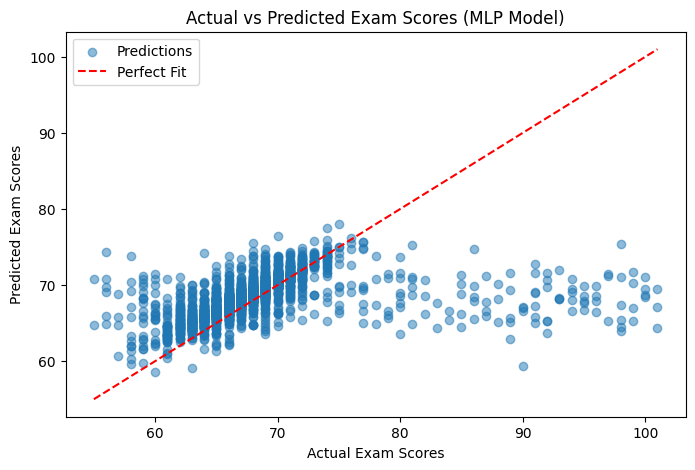

In [45]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Split into Train and Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train MLP Model with Best Parameters
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # 3 hidden layers with decreasing neurons
    activation="relu",  # ReLU activation function
    solver="adam",  # Adam optimiser
    alpha=0.001,  # L2 regularisation (similar to Ridge)
    max_iter=5000,  # More iterations for convergence
    random_state=42
)

mlp_model.fit(X_train, y_train)

# Make Predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate Model Performance
print(f"MLP R² Score: {r2_score(y_test, y_pred_mlp)}")
print("MLP RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))

# Define accuracy function for regression models
def regression_accuracy(y_true, y_pred, tolerance=5):
    """
    Calculates the percentage of predictions that fall within a certain range (tolerance)
    of the actual values.

    Args:
    - y_true: Actual values
    - y_pred: Predicted values
    - tolerance: Acceptable difference for a prediction to be considered 'correct'

    Returns:
    - Accuracy as a percentage
    """
    correct_predictions = np.abs(y_true - y_pred) <= tolerance
    accuracy = np.mean(correct_predictions) * 100
    return accuracy

# Compute accuracy for the MLP model
mlp_accuracy = regression_accuracy(y_test, y_pred_mlp)
print(f"MLP Accuracy (within ±5 points): {mlp_accuracy:.2f}%")

# Scatter plot: actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_mlp, alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores (MLP Model)")
plt.legend()
plt.show()


Iteration 1, loss = 233.52542834
Iteration 2, loss = 37.44711406
Iteration 3, loss = 33.21271748
Iteration 4, loss = 30.90001825
Iteration 5, loss = 28.78081640
Iteration 6, loss = 27.15200083
Iteration 7, loss = 25.92519599
Iteration 8, loss = 25.06183596
Iteration 9, loss = 24.02927797
Iteration 10, loss = 23.07592090
Iteration 11, loss = 22.34331316
Iteration 12, loss = 21.84592047
Iteration 13, loss = 21.21094333
Iteration 14, loss = 20.96362988
Iteration 15, loss = 20.52152425
Iteration 16, loss = 20.27478040
Iteration 17, loss = 19.97281933
Iteration 18, loss = 19.62204561
Iteration 19, loss = 19.22578713
Iteration 20, loss = 19.35234770
Iteration 21, loss = 19.17648081
Iteration 22, loss = 18.59533068
Iteration 23, loss = 18.27577285
Iteration 24, loss = 18.16235206
Iteration 25, loss = 17.93683037
Iteration 26, loss = 18.21186890
Iteration 27, loss = 17.95613814
Iteration 28, loss = 17.59675016
Iteration 29, loss = 17.96092277
Iteration 30, loss = 17.47635404
Iteration 31, loss

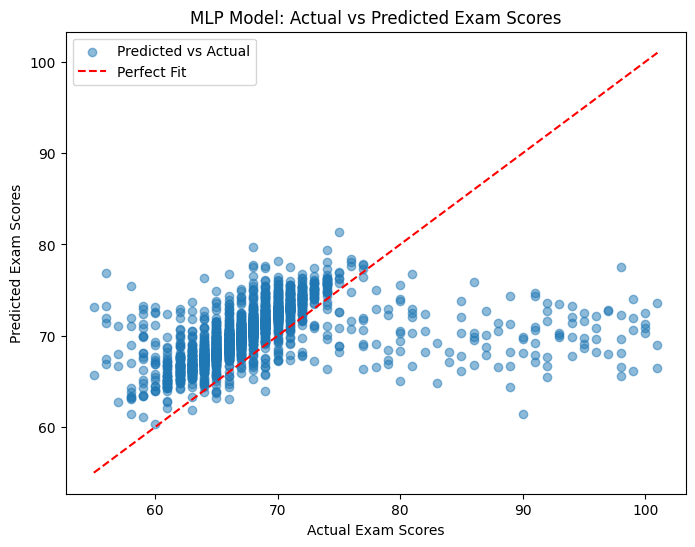

In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# -------------------------------------------
# Step 1: Load and Prepare Data
# -------------------------------------------

# Assuming `df` is already preprocessed and categorical features are one-hot encoded
# Define Features (X) and Target Variable (y)
X = df.drop(columns=["Exam_Score"])  # Features
y = df["Exam_Score"]  # Target variable

# Split into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------------------
# Step 2: Define and Train MLP Model
# -------------------------------------------

# Initialise the MLPRegressor model
mlp_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32, 16),  # Three hidden layers with different neuron sizes
    activation="relu",  # ReLU activation function for non-linearity
    solver="adam",  # Adam optimiser (which improves backpropagation efficiency)
    alpha=0.001,  # Regularisation term to prevent overfitting
    learning_rate="adaptive",  # Adjusts learning rate based on training progress
    max_iter=5000,  # Maximum iterations to ensure convergence
    random_state=42,
    verbose=True  # Enables output logs during training
)

# Train the MLP model using Backpropagation
mlp_model.fit(X_train, y_train)

# -------------------------------------------
# Step 3: Make Predictions
# -------------------------------------------

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test)

# -------------------------------------------
# Step 4: Evaluate Model Performance
# -------------------------------------------

# Compute R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred_mlp)
print(f"MLP R² Score: {r2:.4f}")

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"MLP RMSE: {rmse:.4f}")

# -------------------------------------------
# Step 5: Define Accuracy Function for MLP
# -------------------------------------------

def mlp_regression_accuracy(y_true, y_pred, tolerance=5):
    """
    Calculates the percentage of predictions that fall within a certain range (tolerance)
    of the actual values.

    Args:
    - y_true: Actual values
    - y_pred: Predicted values
    - tolerance: Acceptable difference for a prediction to be considered 'correct'

    Returns:
    - Accuracy as a percentage
    """
    correct_predictions = np.abs(y_true - y_pred) <= tolerance
    accuracy = np.mean(correct_predictions) * 100
    return accuracy

# Compute accuracy for MLP model
mlp_accuracy = mlp_regression_accuracy(y_test, y_pred_mlp)
print(f"MLP Regression Accuracy (within ±5 points): {mlp_accuracy:.2f}%")

# -------------------------------------------
# Step 6: Plot Actual vs Predicted Values
# -------------------------------------------

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("MLP Model: Actual vs Predicted Exam Scores")
plt.legend()
plt.show()


**1.1.5 Ethical Considerations**